In [1]:
import math, random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import random
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [2]:
from models.models import MF_Implicit, GMF_Implicit, NeuMF
from evaluation.utils import prepare_dataset, sample_train_batch
from evaluation.metrics import eval_hr_ndcg

In [3]:
uids, iids, n_users, n_items, uid2idx, iid2idx, revUserIdx, revItemIdx, test_df, train_df, train_ui = prepare_dataset("./data/ratings.csv")

/Users/shreyasghorpade/Desktop/Projects/recommendationsystem/recommendationSystem/evaluation/utils.py:32: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_idx = pos.groupby("userId", group_keys=False).apply(lambda x: x.sample(1, random_state=42)).index


In [4]:
# Training MF implicit Model

model_mf = MF_Implicit(n_users, n_items, k=32).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_mf.parameters(), lr=8e-4, weight_decay=1e-6)

epochs = 30
results_mf = []
for e in range(1, epochs+1):
    model_mf.train()
    U,I,Y = sample_train_batch(train_df, n_items, train_ui, num_neg=4)
    U,I,Y = U.to(device), I.to(device), Y.to(device)
    optimizer.zero_grad()
    loss = criterion(model_mf(U,I), Y); loss.backward(); optimizer.step()

    if e==1 or e%2==0:
        hr, ndcg = eval_hr_ndcg(model_mf, test_df, train_ui, n_items, k=10, n_neg=100, device=device)
        print(f"Epoch {e:02d} | Loss: {loss.item():.4f} | HR@10: {hr:.4f} | NDCG@10: {ndcg:.4f}")
        results_mf.append({"epoch": e, "hr": hr, "ndcg": ndcg})
        
pd.DataFrame(results_mf).to_csv("results/mf_results.csv", index=False)
torch.save(model_mf.state_dict(), "results/mf_model.pth")

Epoch 01 | Loss: 0.6931 | HR@10: 0.1084 | NDCG@10: 0.0488
Epoch 02 | Loss: 0.6932 | HR@10: 0.1133 | NDCG@10: 0.0506
Epoch 04 | Loss: 0.6931 | HR@10: 0.1149 | NDCG@10: 0.0512
Epoch 06 | Loss: 0.6931 | HR@10: 0.1149 | NDCG@10: 0.0509
Epoch 08 | Loss: 0.6931 | HR@10: 0.1199 | NDCG@10: 0.0533
Epoch 10 | Loss: 0.6931 | HR@10: 0.1232 | NDCG@10: 0.0542
Epoch 12 | Loss: 0.6931 | HR@10: 0.1182 | NDCG@10: 0.0538
Epoch 14 | Loss: 0.6931 | HR@10: 0.1199 | NDCG@10: 0.0545
Epoch 16 | Loss: 0.6931 | HR@10: 0.1248 | NDCG@10: 0.0569
Epoch 18 | Loss: 0.6931 | HR@10: 0.1248 | NDCG@10: 0.0569
Epoch 20 | Loss: 0.6931 | HR@10: 0.1281 | NDCG@10: 0.0575
Epoch 22 | Loss: 0.6931 | HR@10: 0.1363 | NDCG@10: 0.0617
Epoch 24 | Loss: 0.6931 | HR@10: 0.1363 | NDCG@10: 0.0610
Epoch 26 | Loss: 0.6931 | HR@10: 0.1396 | NDCG@10: 0.0625
Epoch 28 | Loss: 0.6931 | HR@10: 0.1346 | NDCG@10: 0.0626
Epoch 30 | Loss: 0.6931 | HR@10: 0.1363 | NDCG@10: 0.0633


In [5]:
model_gmf = GMF_Implicit(n_users, n_items, k=32).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_gmf.parameters(), lr=8e-4, weight_decay=1e-6)

epochs = 30
results_gmf = []
for e in range(1, epochs+1):
    model_gmf.train()
    U,I,Y = sample_train_batch(train_df, n_items, train_ui, num_neg=4)
    U,I,Y = U.to(device), I.to(device), Y.to(device)
    optimizer.zero_grad()
    loss = criterion(model_gmf(U,I), Y); loss.backward(); optimizer.step()

    if e==1 or e%2==0:
        hr, ndcg = eval_hr_ndcg(model_gmf, test_df, train_ui, n_items, k=10, n_neg=100, device=device)
        print(f"Epoch {e:02d} | Loss: {loss.item():.4f} | HR@10: {hr:.4f} | NDCG@10: {ndcg:.4f}")
        results_gmf.append({"epoch": e, "hr": hr, "ndcg": ndcg})
        
pd.DataFrame(results_gmf).to_csv("results/gmf_results.csv", index=False)
torch.save(model_gmf.state_dict(), "results/gmf_model.pth")

Epoch 01 | Loss: 0.6931 | HR@10: 0.1215 | NDCG@10: 0.0555
Epoch 02 | Loss: 0.6929 | HR@10: 0.1264 | NDCG@10: 0.0560
Epoch 04 | Loss: 0.6924 | HR@10: 0.1199 | NDCG@10: 0.0526
Epoch 06 | Loss: 0.6919 | HR@10: 0.1264 | NDCG@10: 0.0529
Epoch 08 | Loss: 0.6915 | HR@10: 0.1232 | NDCG@10: 0.0521
Epoch 10 | Loss: 0.6910 | HR@10: 0.1232 | NDCG@10: 0.0527
Epoch 12 | Loss: 0.6905 | HR@10: 0.1264 | NDCG@10: 0.0539
Epoch 14 | Loss: 0.6900 | HR@10: 0.1248 | NDCG@10: 0.0542
Epoch 16 | Loss: 0.6896 | HR@10: 0.1281 | NDCG@10: 0.0555
Epoch 18 | Loss: 0.6891 | HR@10: 0.1346 | NDCG@10: 0.0584
Epoch 20 | Loss: 0.6886 | HR@10: 0.1346 | NDCG@10: 0.0594
Epoch 22 | Loss: 0.6881 | HR@10: 0.1396 | NDCG@10: 0.0618
Epoch 24 | Loss: 0.6877 | HR@10: 0.1379 | NDCG@10: 0.0616
Epoch 26 | Loss: 0.6872 | HR@10: 0.1379 | NDCG@10: 0.0635
Epoch 28 | Loss: 0.6867 | HR@10: 0.1412 | NDCG@10: 0.0663
Epoch 30 | Loss: 0.6863 | HR@10: 0.1445 | NDCG@10: 0.0699


In [6]:
model_neumf = NeuMF(n_users, n_items, k_gmf=32, k_mlp=32, mlp_layers=(64,32,16)).to(device)
opt = torch.optim.Adam(model_neumf.parameters(), lr=8e-4, weight_decay=1e-6)
crit = nn.BCEWithLogitsLoss()

epochs = 30
results_neumf = []
for e in range(1, epochs+1):
    model_neumf.train()
    # (optional) sample a subset of users each epoch for speed on larger data
    batch_users = None
    U,I,Y = sample_train_batch(train_df, n_items, train_ui, num_neg=4, users_subset=batch_users)
    U,I,Y = U.to(device), I.to(device), Y.to(device)
    opt.zero_grad()
    loss = crit(model_neumf(U,I), Y); loss.backward(); opt.step()

    if e==1 or e%2==0:
        hr, ndcg = eval_hr_ndcg(model_neumf, test_df, train_ui, n_items, k=10, n_neg=100, device=device)
        print(f"Epoch {e:02d} | BCE: {loss.item():.4f} | HR@10: {hr:.4f} | NDCG@10: {ndcg:.4f}")
        results_neumf.append({'epoch': e, "hr": hr, "ndcg":ndcg})
        
pd.DataFrame(results_neumf).to_csv("results/neumf_results.csv", index=False)
torch.save(model_neumf.state_dict(), "results/neumf_model.pth")

Epoch 01 | BCE: 0.6957 | HR@10: 0.1363 | NDCG@10: 0.0593
Epoch 02 | BCE: 0.6940 | HR@10: 0.1839 | NDCG@10: 0.0917
Epoch 04 | BCE: 0.6906 | HR@10: 0.3333 | NDCG@10: 0.1813
Epoch 06 | BCE: 0.6873 | HR@10: 0.4138 | NDCG@10: 0.2656
Epoch 08 | BCE: 0.6840 | HR@10: 0.5172 | NDCG@10: 0.3299
Epoch 10 | BCE: 0.6807 | HR@10: 0.5665 | NDCG@10: 0.3747
Epoch 12 | BCE: 0.6774 | HR@10: 0.5944 | NDCG@10: 0.3990
Epoch 14 | BCE: 0.6743 | HR@10: 0.6141 | NDCG@10: 0.4183
Epoch 16 | BCE: 0.6712 | HR@10: 0.6223 | NDCG@10: 0.4291
Epoch 18 | BCE: 0.6681 | HR@10: 0.6388 | NDCG@10: 0.4398
Epoch 20 | BCE: 0.6651 | HR@10: 0.6502 | NDCG@10: 0.4487
Epoch 22 | BCE: 0.6620 | HR@10: 0.6634 | NDCG@10: 0.4500
Epoch 24 | BCE: 0.6587 | HR@10: 0.6683 | NDCG@10: 0.4568
Epoch 26 | BCE: 0.6554 | HR@10: 0.6700 | NDCG@10: 0.4612
Epoch 28 | BCE: 0.6519 | HR@10: 0.6782 | NDCG@10: 0.4621
Epoch 30 | BCE: 0.6482 | HR@10: 0.6946 | NDCG@10: 0.4705


In [7]:
mf = pd.read_csv("results/mf_results.csv")
gmf = pd.read_csv("results/gmf_results.csv")
neumf = pd.read_csv("results/neumf_results.csv")

# Check
display(mf.head(), gmf.head(), neumf.head())

,epoch,hr,ndcg
0,1,0.108374,0.048844
1,2,0.113300,0.050597
2,4,0.114943,0.051203
3,6,0.114943,0.050854
4,8,0.119869,0.053308


,epoch,hr,ndcg
0,1,0.121511,0.055479
1,2,0.126437,0.055998
2,4,0.119869,0.052588
3,6,0.126437,0.052930
4,8,0.123153,0.052097


,epoch,hr,ndcg
0,1,0.136289,0.059283
1,2,0.183908,0.091696
2,4,0.333333,0.181329
3,6,0.413793,0.265572
4,8,0.517241,0.329939


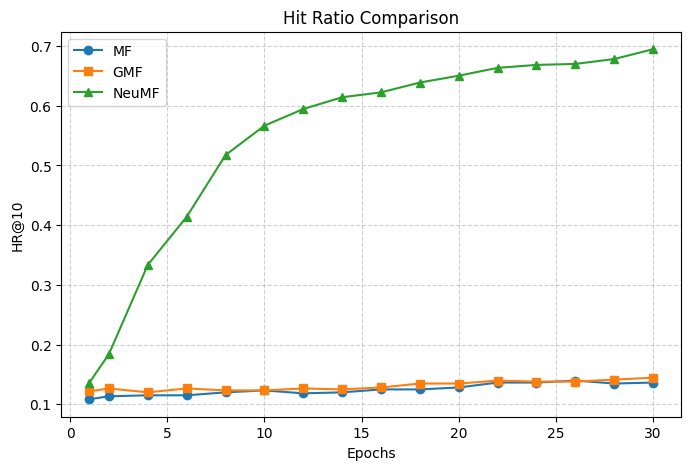

In [8]:
# Plot HR@10
plt.figure(figsize=(8,5))
plt.plot(mf["epoch"], mf["hr"], label="MF", marker="o")
plt.plot(gmf["epoch"], gmf["hr"], label="GMF", marker="s")
plt.plot(neumf["epoch"], neumf["hr"], label="NeuMF", marker="^")
plt.xlabel("Epochs"); plt.ylabel("HR@10"); plt.title("Hit Ratio Comparison")
plt.legend(); plt.grid(True, linestyle="--", alpha=0.6); plt.show()

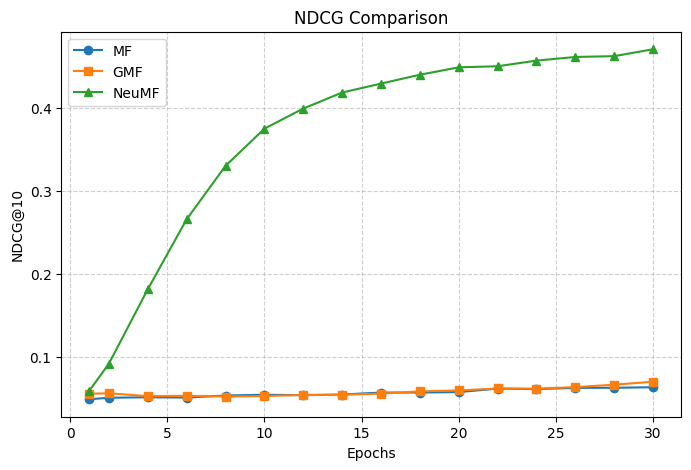

In [9]:
plt.figure(figsize=(8,5))
plt.plot(mf["epoch"], mf["ndcg"], label="MF", marker="o")
plt.plot(gmf["epoch"], gmf["ndcg"], label="GMF", marker="s")
plt.plot(neumf["epoch"], neumf["ndcg"], label="NeuMF", marker="^")
plt.xlabel("Epochs"); plt.ylabel("NDCG@10"); plt.title("NDCG Comparison")
plt.legend(); plt.grid(True, linestyle="--", alpha=0.6); plt.show()

In [10]:
# Final table
summary = pd.DataFrame({
    "Model": ["MF", "GMF", "NeuMF"],
    "Best HR@10": [mf["hr"].max(), gmf["hr"].max(), neumf["hr"].max()],
    "Best NDCG@10": [mf["ndcg"].max(), gmf["ndcg"].max(), neumf["ndcg"].max()]
})
display(summary)

,Model,Best HR@10,Best NDCG@10
0,MF,0.139573,0.063283
1,GMF,0.144499,0.069946
2,NeuMF,0.694581,0.470486
